In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import matplotlib.image as mig
import os


#training on GPU

gpu_=tf.test.gpu_device_name()
tf.device(gpu_)

In [2]:
PATH = 'PokemonData/'
classes = os.listdir(PATH)




c1_path=os.path.join(PATH, classes[1])
c1_data_path=[os.path.join(c1_path, img) for img in os.listdir(c1_path) ]
len(c1_data_path)


for i in range(0,5):
  img = mig.imread(c1_data_path[i])
  
  print(i,img.shape)

0 (220, 229, 3)
1 (422, 422, 3)
2 (723, 723, 3)
3 (597, 597, 3)
4 (170, 170, 3)


In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
IDG = ImageDataGenerator(rescale = 1./255 )

train_data = IDG.flow_from_directory(PATH,target_size=(256,256),batch_size=8) 


Found 6820 images belonging to 151 classes.


In [4]:
sample_x,sample_y = next(train_data)



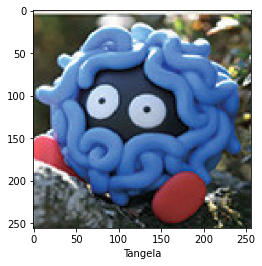

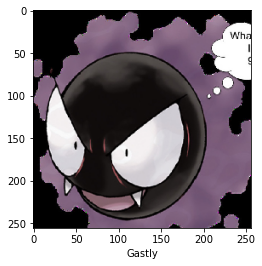

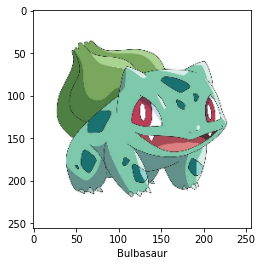

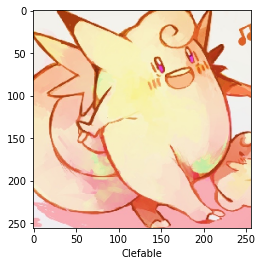

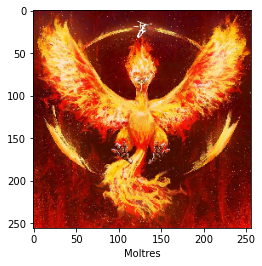

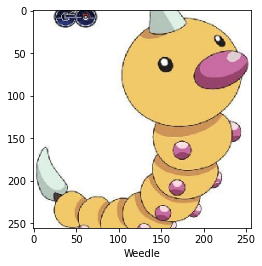

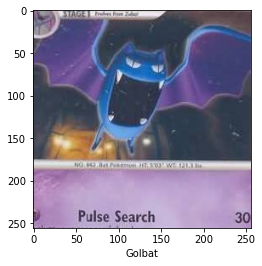

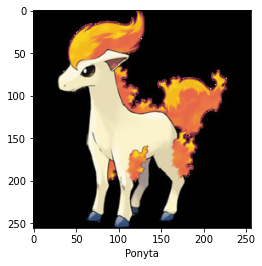

In [7]:
for x,y in zip( sample_x,sample_y ):
  #x = np.rollaxis(x, 0, 3)
  plt.imshow(x)
  plt.xlabel(classes[y.argmax()])
  plt.show()

In [8]:
img_shape=(256,256,3)


model = keras.Sequential(name='RGBimg_Classify_Net')
model.add(keras.layers.Conv2D(128,3,input_shape=(img_shape),activation='relu'))
model.add(keras.layers.MaxPool2D())
#model.add(keras.layers.Conv2D(128,3,activation='relu'))
#model.add(keras.layers.MaxPool2D())
model.add(keras.layers.Conv2D(128,3,strides=(2,2),activation='relu'))
model.add(keras.layers.MaxPool2D())
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Conv2D(64,3,strides=(2,2),activation='relu'))
model.add(keras.layers.MaxPool2D())
model.add(keras.layers.Flatten())
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.Dense(1024,activation='relu'))
model.add(keras.layers.Dense(512,activation='relu'))
model.add(keras.layers.Dense(len(classes),activation='softmax'))


model.summary()

Model: "RGBimg_Classify_Net"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 254, 254, 128)     3584      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 127, 127, 128)     0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 63, 63, 128)       147584    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 31, 31, 128)       0         
_________________________________________________________________
batch_normalization (BatchNo (None, 31, 31, 128)       512       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 15, 15, 64)        73792     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 64)  

In [9]:
model.compile(optimizer='adam',
             loss=tf.keras.losses.categorical_crossentropy,
             metrics=['accuracy']
             )

hist = model.fit_generator(train_data,epochs=20)

Instructions for updating:
Please use Model.fit, which supports generators.
  ...
    to  
  ['...']
Train for 853 steps
Epoch 1/20
372/853 [============>.................] - ETA: 9:51 - loss: 4.9914 - accuracy: 0.0155

KeyboardInterrupt: 

In [ ]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(14,14))
plt.plot(hist.history['accuracy'],label='accuracy',color='green')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.yticks(np.arange(0, 1, step=0.04))
plt.show()

In [ ]:
plt.figure(figsize=(20,20))
#for _ in range(3):
sam_x,sam_y = next(train_data) 
pred_ = model.predict(sam_x)
for i in range(len(sam_x)):
    pred,y = pred_[i].argmax(), sam_y[i].argmax()
    plt.subplot(4,4,i+1)
    plt.imshow(sam_x[i])
    title_ = 'Predict:' + str(classes[pred])+ ';   Label:' + str(classes[y])
    plt.title(title_,size=11)
plt.show()